In [ ]:
# default_exp gbe.ist.reliability

# Information Sampling Task - Reliability

<div>
    <p style="float: left;"><img src="images/card_game.png" alt="Drawing" width="200px", style="width: 200px; border-right:10px solid white"/> 
        
</div>

In [ ]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
%reload_ext rpy2.ipython
import seaborn as sns
from matplotlib import pyplot as plt
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="white", font_scale = 1.3, rc=custom_params)

In [ ]:
#export
%load_ext autoreload
%autoreload 2
from trr265.gbe.ist.data_provider import ISTDataProvider
import trr265.gbe.ist.scoring as ist_scoring 
import trr265.stats as stats
import pandas as pd
from trr265 import plotting

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Loading the data
In this notebook, all tests and examples are run on the initial baseline dataset.

In [ ]:
# Getting raw data
dp = ISTDataProvider('/Users/hilmarzech/Projects/trr265/trr265/data/')
df = dp.get_ist_data(update = True)
# Adding data from redcap
df = df.merge(dp.get_gbe_data(columns = ['participant','session_number','is_initial','is_baseline']), left_on = 'gbe_index', right_index = True, how = 'left')
# Filtering out replication and ema data
df = df.query("is_initial and is_baseline")

Preparing ist_data


## Test-retest reliability

### Based on mean oversampling

R[write to console]: Loading required package: psych



,type,ICC,F,df1,df2,p,lower bound,upper bound,description
Single_raters_absolute,ICC1,0.804,9.212,236.0,237.0,0.0,0.763,0.839,".80 (.76, .84)"
Single_random_raters,ICC2,0.805,9.743,236.0,236.0,0.0,0.758,0.843,".81 (.76, .84)"
Single_fixed_raters,ICC3,0.814,9.743,236.0,236.0,0.0,0.774,0.847,".81 (.77, .85)"
Average_raters_absolute,ICC1k,0.891,9.212,236.0,237.0,0.0,0.865,0.912,".89 (.87, .91)"
Average_random_raters,ICC2k,0.892,9.743,236.0,236.0,0.0,0.862,0.915,".89 (.86, .91)"
Average_fixed_raters,ICC3k,0.897,9.743,236.0,236.0,0.0,0.873,0.917,".90 (.87, .92)"


,variance,Percent
ID,0.428,0.805
Items,0.006,0.011
Residual,0.098,0.184
Total,0.531,1.000


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


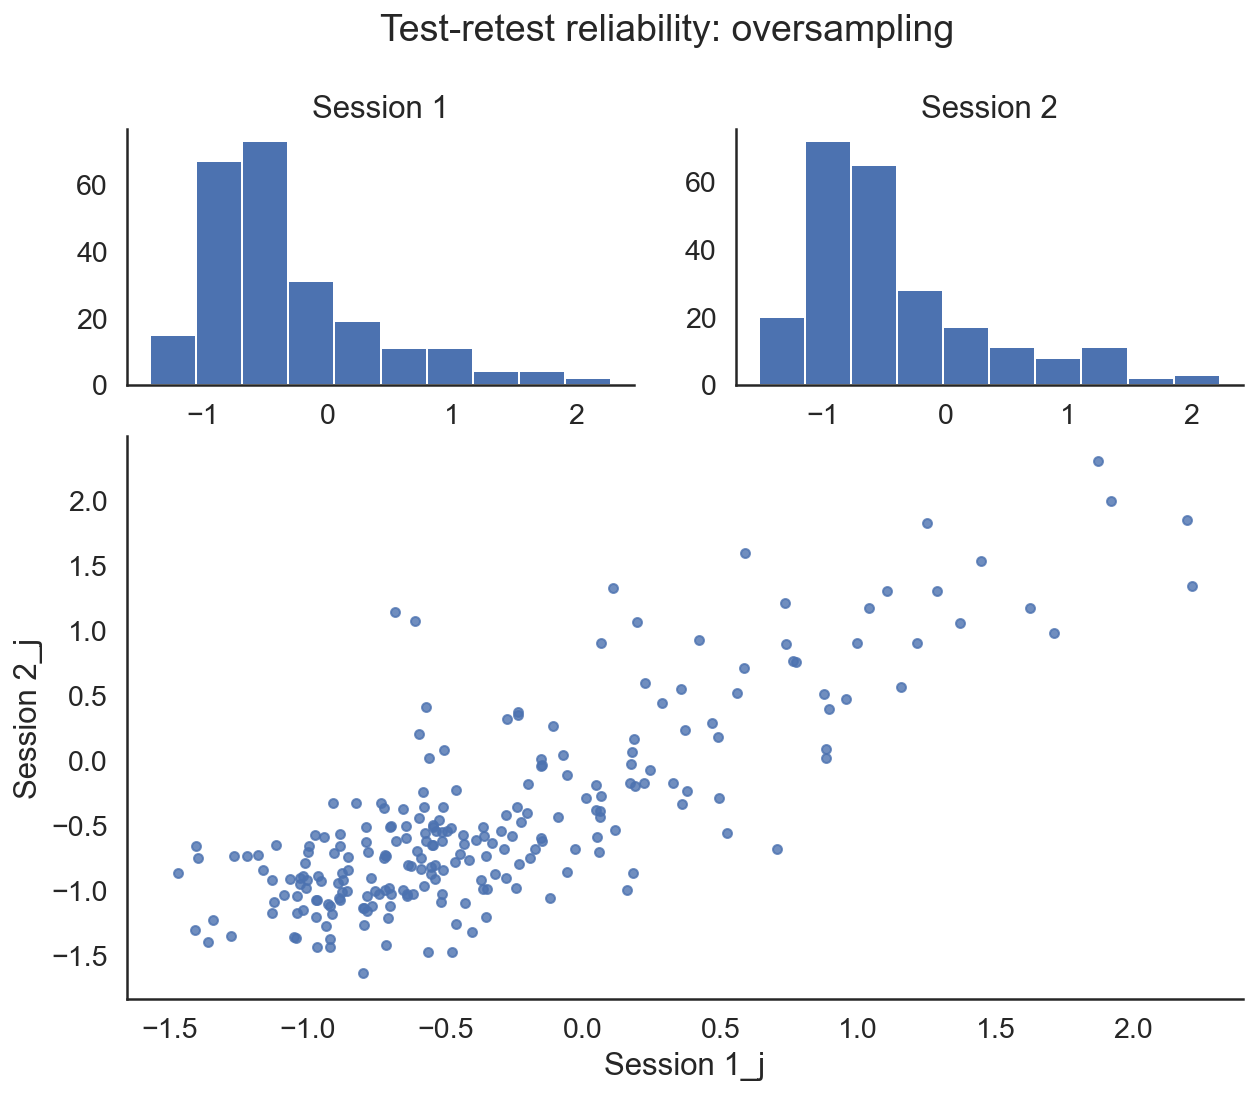

In [ ]:
_df = ist_scoring.get_average_oversampling(df)
_df = _df.merge(dp.get_gbe_data(columns = ['participant','session_number','is_initial','is_baseline']), left_on = 'gbe_index', right_index = True, how = 'left')
iccs_mean = stats.analyze_reliability(_df, dependent = 'oversampling', add_jitter = True)

### Based on predicted values (separate models)
Test-retest reliability for scores predicted by separate models for each session (for calculation of scores see `ist_scoring.get_oversampling_sep`).

R[write to console]: Loading required package: lme4

R[write to console]: Loading required package: Matrix

R[write to console]: 
Attaching package: ‘lmerTest’


R[write to console]: The following object is masked from ‘package:lme4’:

    lmer


R[write to console]: The following object is masked from ‘package:stats’:

    step




,type,ICC,F,df1,df2,p,lower bound,upper bound,description
Single_raters_absolute,ICC1,0.798,8.917,236.0,237.0,0.0,0.756,0.834,".80 (.76, .83)"
Single_random_raters,ICC2,0.800,9.623,236.0,236.0,0.0,0.746,0.841,".80 (.75, .84)"
Single_fixed_raters,ICC3,0.812,9.623,236.0,236.0,0.0,0.772,0.845,".81 (.77, .85)"
Average_raters_absolute,ICC1k,0.888,8.917,236.0,237.0,0.0,0.861,0.909,".89 (.86, .91)"
Average_random_raters,ICC2k,0.889,9.623,236.0,236.0,0.0,0.855,0.914,".89 (.85, .91)"
Average_fixed_raters,ICC3k,0.896,9.623,236.0,236.0,0.0,0.871,0.916,".90 (.87, .92)"


,variance,Percent
ID,0.320,0.800
Items,0.006,0.015
Residual,0.074,0.186
Total,0.400,1.000


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


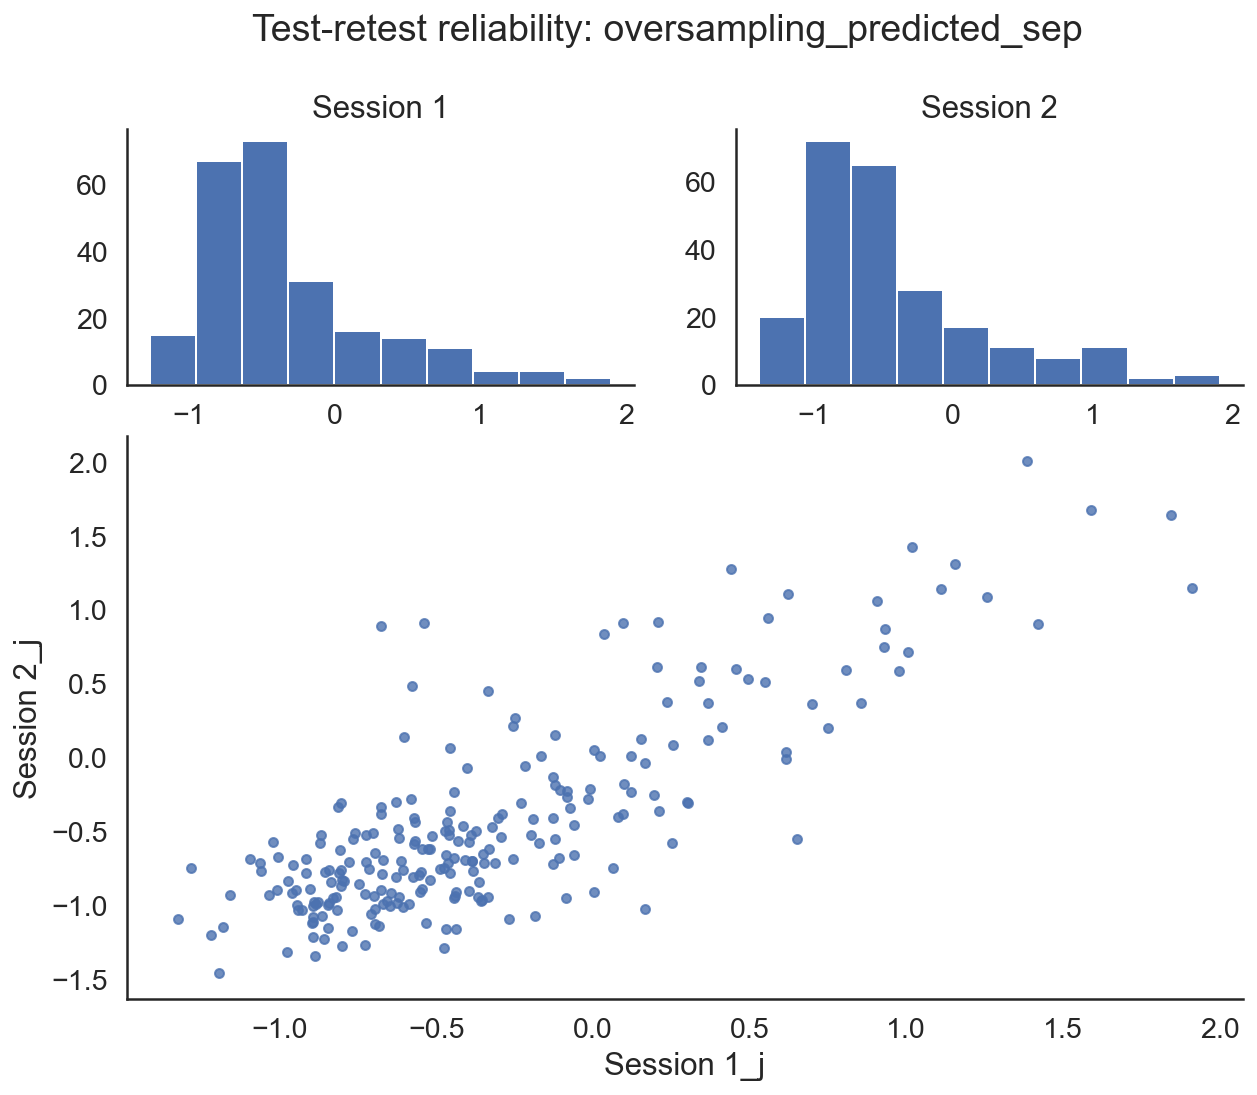

In [ ]:
_df = ist_scoring.get_oversampling_sep(df)[0]
_df = _df.merge(dp.get_gbe_data(columns = ['participant','session_number','is_initial','is_baseline']), left_on = 'gbe_index', right_index = True, how = 'left')
iccs_predicted_sep = stats.analyze_reliability(_df, dependent = 'oversampling_predicted_sep', add_jitter = True)

### Based on predicted values (joint model)
Test-retest reliability for scores predicted by a joint model (for calculation of scores see `ist_scoring.get_oversampling_predicted_joint`).

,type,ICC,F,df1,df2,p,lower bound,upper bound,description
Single_raters_absolute,ICC1,0.976,82.093,236.0,237.0,0.0,0.970,0.981,".98 (.97, .98)"
Single_random_raters,ICC2,0.976,86.831,236.0,236.0,0.0,0.969,0.981,".98 (.97, .98)"
Single_fixed_raters,ICC3,0.977,86.831,236.0,236.0,0.0,0.972,0.982,".98 (.97, .98)"
Average_raters_absolute,ICC1k,0.988,82.093,236.0,237.0,0.0,0.985,0.990,".99 (.98, .99)"
Average_random_raters,ICC2k,0.988,86.831,236.0,236.0,0.0,0.984,0.990,".99 (.98, .99)"
Average_fixed_raters,ICC3k,0.988,86.831,236.0,236.0,0.0,0.986,0.991,".99 (.99, .99)"


,variance,Percent
ID,0.404,0.976
Items,0.001,0.001
Residual,0.009,0.023
Total,0.414,1.000


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


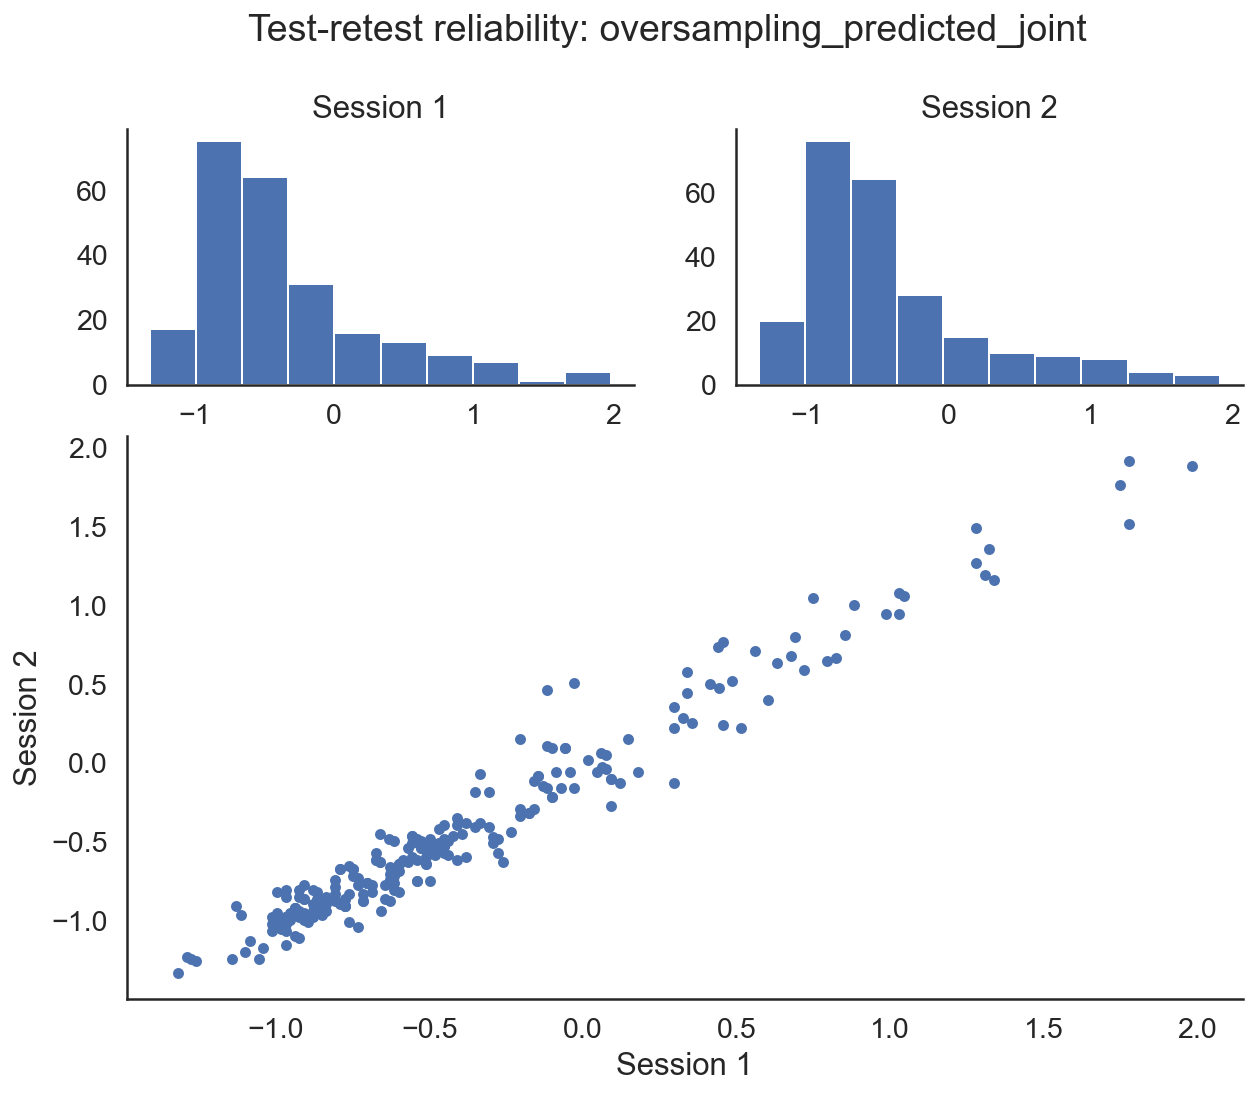

In [ ]:
_df, ms = ist_scoring.get_oversampling_predicted_joint(df)
_df = _df.merge(dp.get_gbe_data(columns = ['participant','session_number','is_initial','is_baseline']), left_on = 'gbe_index', right_index = True, how = 'left')
iccs_predicted_joint = stats.analyze_reliability(_df, dependent = 'oversampling_predicted_joint', add_jitter = False)

### Based on model-calculated variances

In [ ]:
model_calc = stats.get_model_calculated_icc(ms)
model_calc['icc']

R[write to console]: Loading required package: insight



0.9301758722342343

## Comparison of methods

### All methods

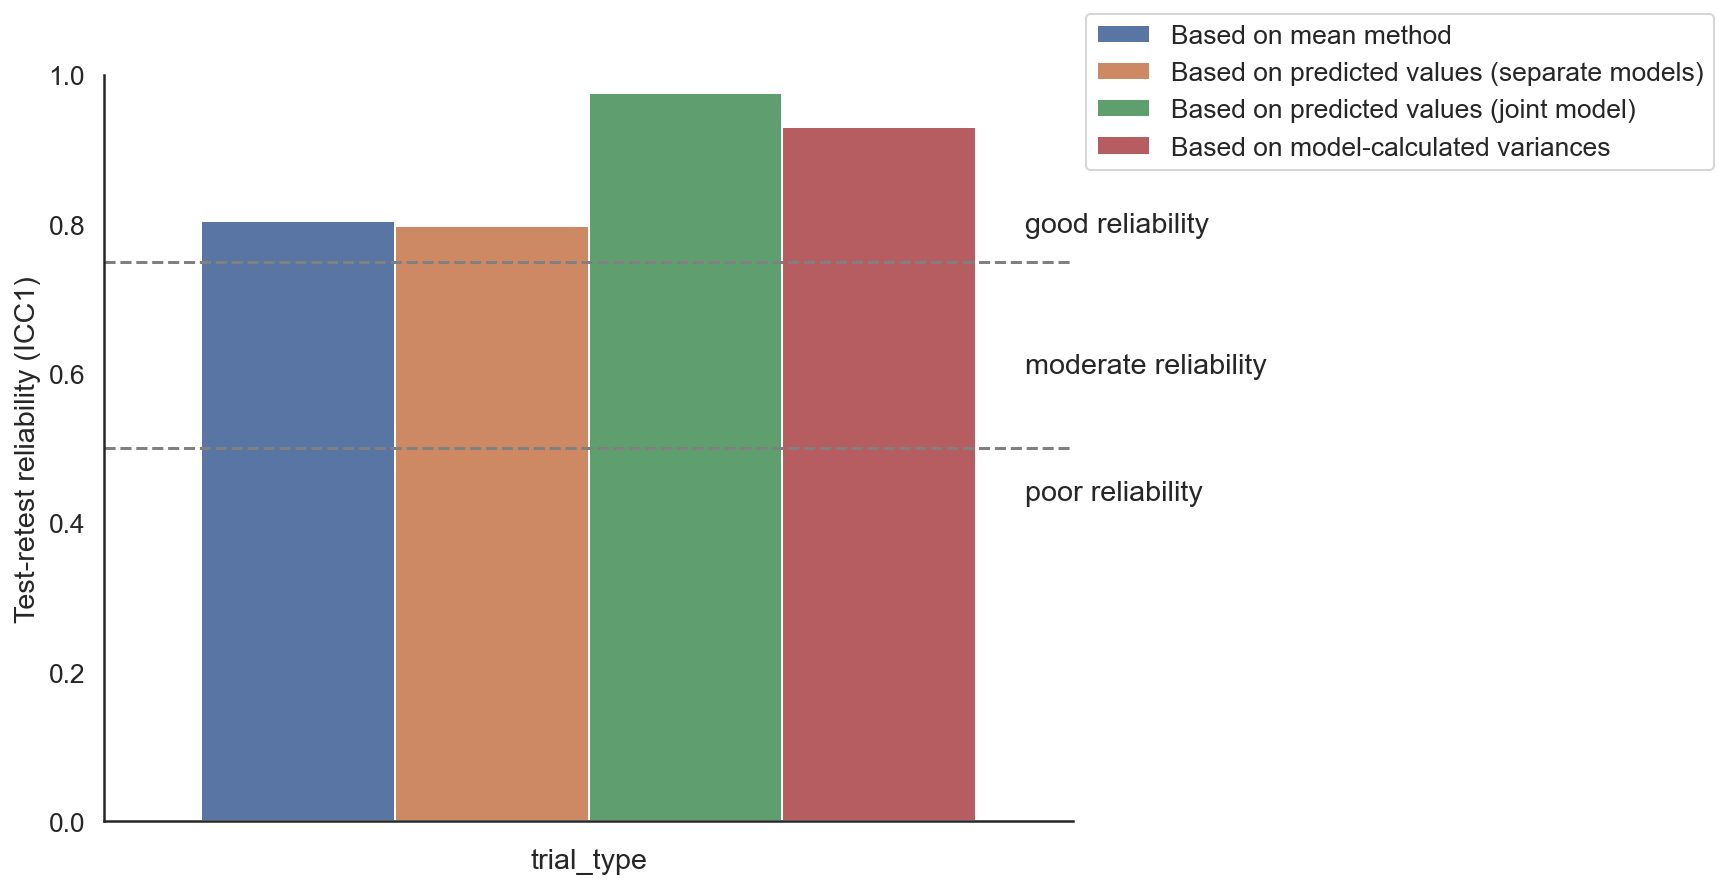

In [ ]:
iccs = {
    "mean_": iccs_mean,
    "trial_sep_": iccs_predicted_sep,
    "trial_joint_": iccs_predicted_joint,
    "model_calc_": model_calc
}

g = plotting.icc_comparison_plot(iccs, aspect = 1.3,qualitative_labels = True, 
                        x_offset = 0.45, font_scale = 1.2)

### Selected methods for manuscript

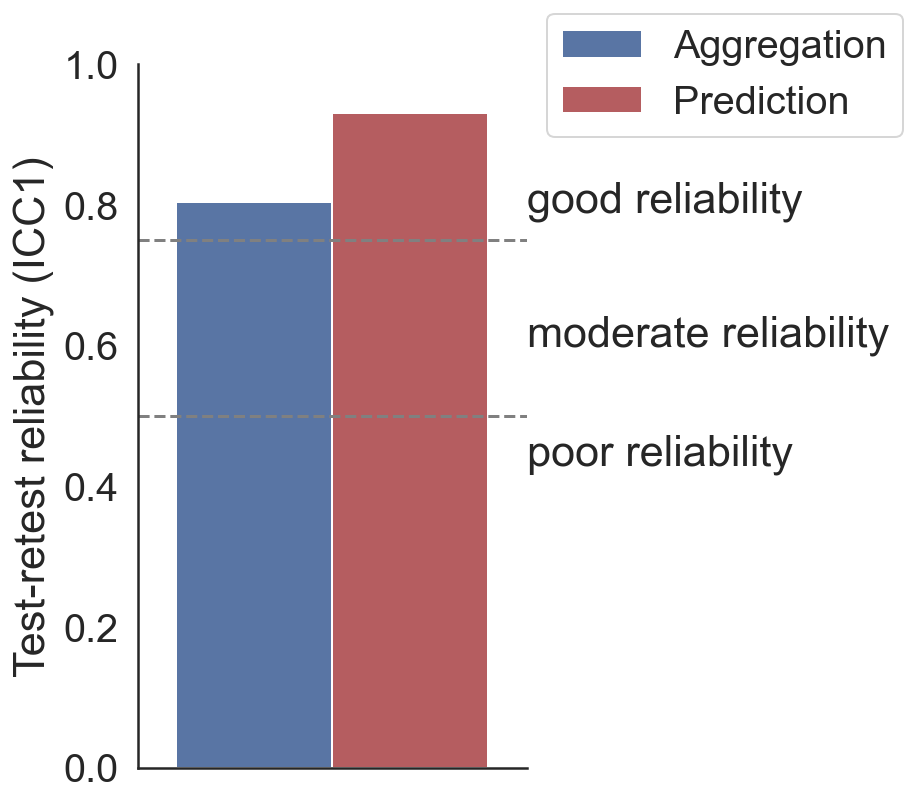

In [ ]:
iccs = {
    "Aggregation_": iccs_mean,
    "Prediction_": model_calc,
}

palette=sns.color_palette([(0.2980392156862745, 0.4470588235294118, 0.6901960784313725), (0.7686274509803922, 0.3058823529411765, 0.3215686274509804)])
g = plotting.icc_comparison_plot(iccs, 
                       
                       palette = palette,
                       aspect = .7,
                       qualitative_labels = True,
                       x_offset = .5,
                       font_scale = 1.8)

ax = g.axes[0][0]

ax.set_xlabel('');


## Variance proportions

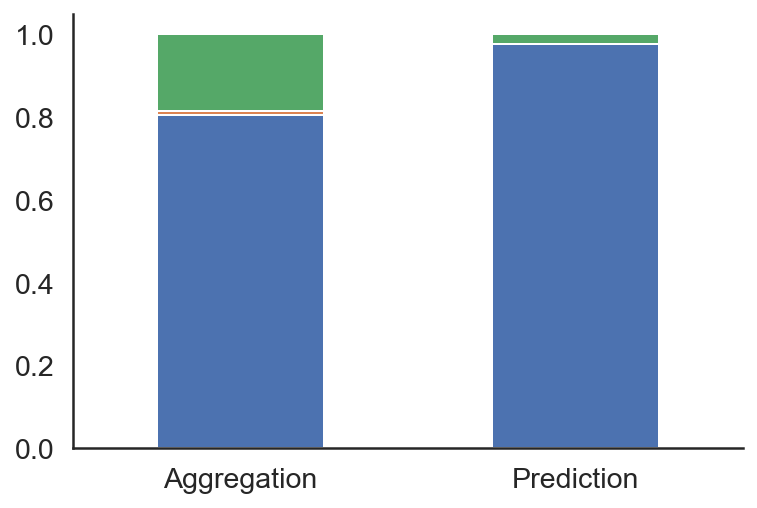

In [ ]:
ax = stats.var_comp_plot({'Aggregation':iccs_mean,'Prediction':iccs_predicted_joint})
ax.get_legend().remove()

## Effect of time

N = 94


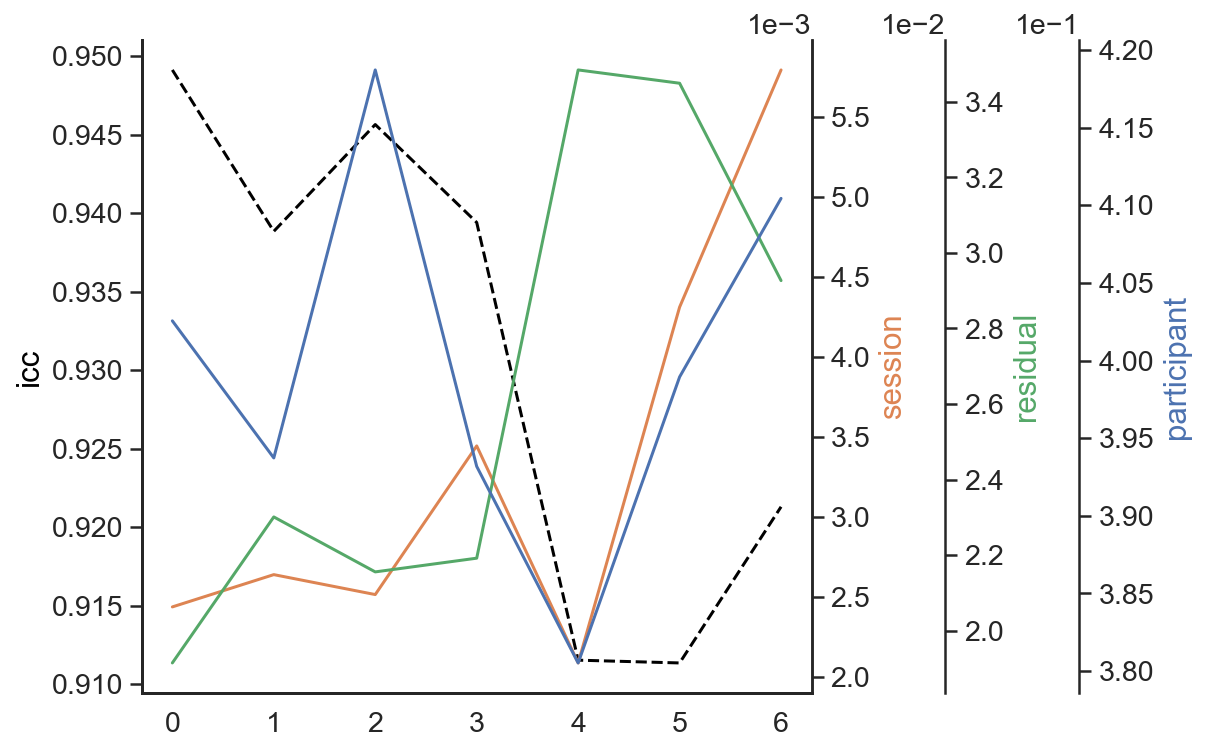

In [ ]:
ax = stats.plot_time_effect(scores, 8, "oversampling_predicted_joint", scaling = 'variance', change = False)
ax.figure.set_size_inches(6, 6)

N = 94


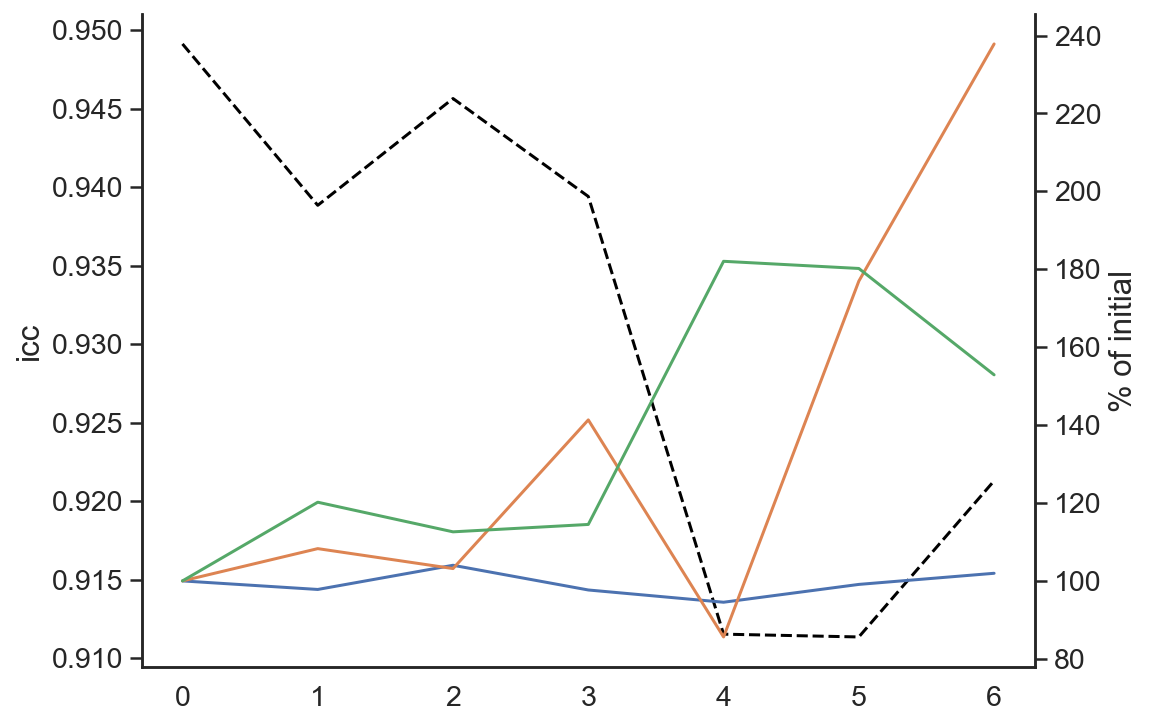

In [ ]:
ax = stats.plot_time_effect(scores, 8, "oversampling_predicted_joint", scaling = 'variance', change = True)
ax.figure.set_size_inches(8, 6)

In [ ]:
scores = stats.get_scores(dp, dp.get_ist_data, ist_scoring.get_oversampling_predicted_joint)

N = 94


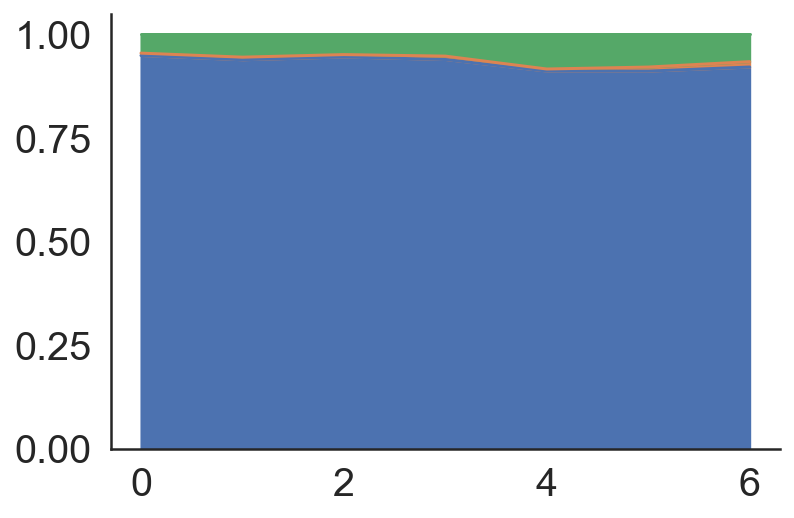

In [ ]:
stats.plot_time_effect(scores, 8, "oversampling_predicted_joint")

In [ ]:
def get_icc_and_variance(_df,
            dependent,
           icc_type = 'ICC2', scaling = 'Percent'): 
    '''Helper function that gets ICCs and variances'''
    outcomes = stats.analyze_reliability(_df, dependent = dependent, silent = True)['iccs']
    icc = outcomes[0].query('type=="%s"'%icc_type)['ICC'].iloc[0]
    variances = outcomes[1].T
    variances.columns = ['Participant','Session','Residual','Total']
    variances = variances.loc[scaling]
    return icc,variances.loc['Participant'],variances.loc['Session'],variances.loc['Residual']

get_icc_and_variance(scores,"oversampling_predicted_joint", scaling = 'variance')

R[write to console]: boundary (singular) fit: see ?isSingular



(0.964168259420837, 0.7736178120845465, 0.0, 0.028750244035915782)

### Absolute plot

N = 94


,icc,participant,session,residual
0,0.949124,0.402557,0.002436,0.019142
1,0.938844,0.393727,0.002638,0.023009
2,0.945646,0.418714,0.002513,0.021554
3,0.939409,0.393183,0.003443,0.021917
4,0.911529,0.380525,0.002086,0.034847
5,0.911351,0.398943,0.004311,0.034495
6,0.921298,0.410443,0.005794,0.029268


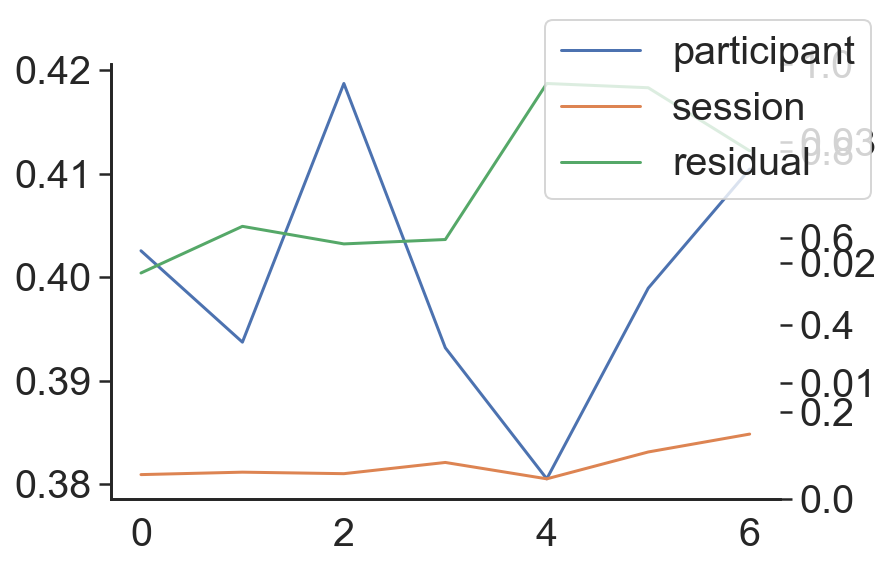

In [ ]:
def plot_time_effect(_df, sessions, dependent, legend = False, scaling = 'Percent'):
    time_data = []
    # Checking which participants have all sessions
    pps = _df.query('session_number<%d'%(sessions+1)).groupby('participant')[_df.columns[0]].agg(lambda x: len(x.dropna()))==sessions
    pps = pps[pps].index
    print("N = %d"%(len(pps)))

    for i in range(sessions-1):
        session_filter = "(session_number==1) or (session_number==%d)"%(i+2)
        __df = _df.query(session_filter)
        __df = __df[__df.participant.isin(pps)]
        d = {}
        d['icc'],d['participant'],d['session'],d['residual'] = get_icc_and_variance(__df, dependent, scaling = scaling)
        time_data.append(d)
    df = pd.DataFrame(time_data, index = pd.Series(range(sessions-1)))
    #ax = df[['participant','session','residual']].plot.area(legend = legend)
    display(df)
    ax = df.plot(y="participant", legend=False, color = sns.color_palette()[0])
    ax2 = ax.twinx()
    df.plot(y="session", ax=ax2, legend=False, color = sns.color_palette()[1])
    ax3 = ax.twinx()
    df.plot(y="residual", ax=ax2, legend=False, color = sns.color_palette()[2])
    ax.figure.legend()
    ax.xaxis.get_major_locator().set_params(integer=True)
    
plot_time_effect(scores, 8, "oversampling_predicted_joint", scaling = 'variance')

### Relative change plot

N = 94


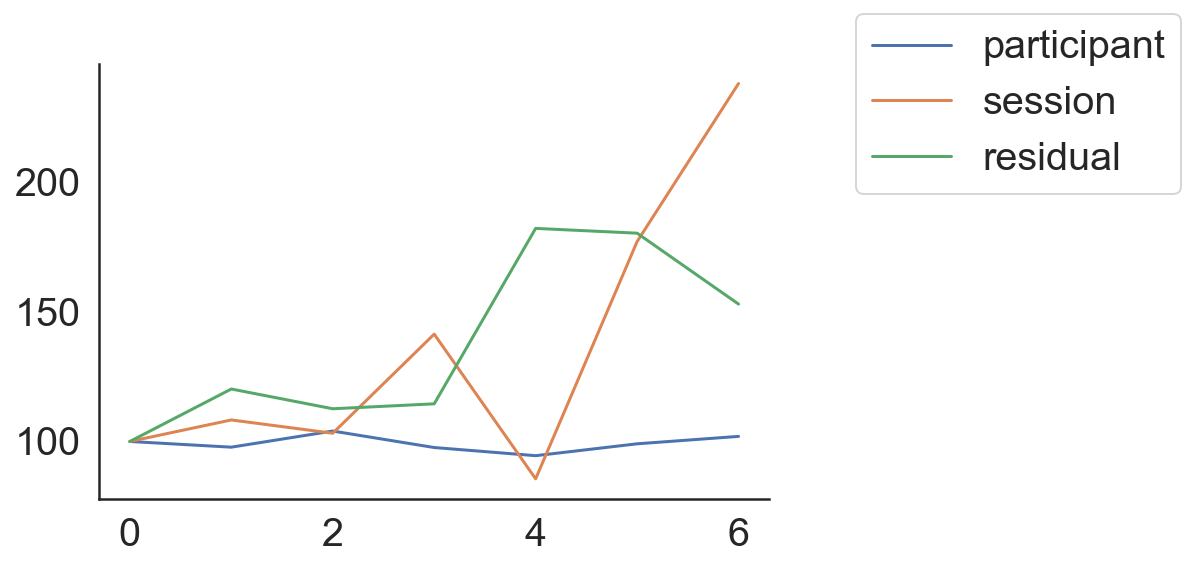

In [ ]:
def plot_time_effect(_df, sessions, dependent, legend = False, scaling = 'Percent', change = False):
    time_data = []
    # Checking which participants have all sessions
    pps = _df.query('session_number<%d'%(sessions+1)).groupby('participant')[_df.columns[0]].agg(lambda x: len(x.dropna()))==sessions
    pps = pps[pps].index
    print("N = %d"%(len(pps)))

    for i in range(sessions-1):
        session_filter = "(session_number==1) or (session_number==%d)"%(i+2)
        __df = _df.query(session_filter)
        __df = __df[__df.participant.isin(pps)]
        d = {}
        d['icc'],d['participant'],d['session'],d['residual'] = get_icc_and_variance(__df, dependent, scaling = scaling)
        time_data.append(d)
    df = pd.DataFrame(time_data, index = pd.Series(range(sessions-1)))
    if change:
        df = (df/df.iloc[0])*100
    ax = df[['participant','session','residual']].plot(legend = legend)
    #display(df)
    #ax = df.plot(y="participant", legend=False, color = sns.color_palette()[0])
    #ax2 = ax.twinx()
    #df.plot(y="session", ax=ax2, legend=False, color = sns.color_palette()[1])
    #ax3 = ax.twinx()
    #df.plot(y="residual", ax=ax2, legend=False, color = sns.color_palette()[2])
    ax.figure.legend(bbox_to_anchor=[1.4, 1])
    ax.xaxis.get_major_locator().set_params(integer=True)
    
_df = plot_time_effect(scores, 8, "oversampling_predicted_joint", scaling = 'variance', change = True)

### Area plot

N = 94


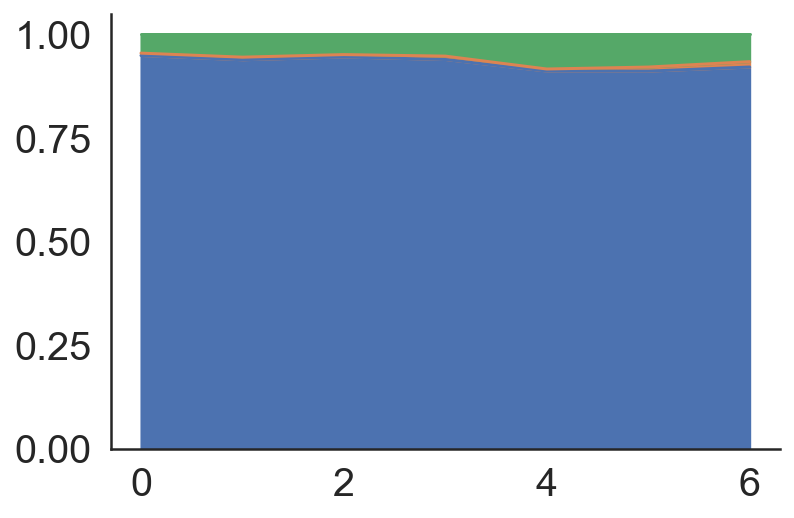

In [ ]:
plot_time_effect(scores, 8, "oversampling_predicted_joint")